In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

np.random.seed(123)


In [2]:
def rwm_chain(N, s, x0):
    x= np.zeros(N)
    x[0]=x0

    for i in range(1, N):
        x_str = np.random.normal(loc=x[i-1], scale=s)
        rfunction = ((1/2)*np.exp(-abs(x_str)))/((1/2)*np.exp(-abs(x[i-1])))
        u = np.random.uniform(0, 1)
        if u < rfunction:
            x[i] = x_str
        else:
            x[i] = x[i-1]
    return x

In [3]:
y = rwm_chain(10000, 1, 0)

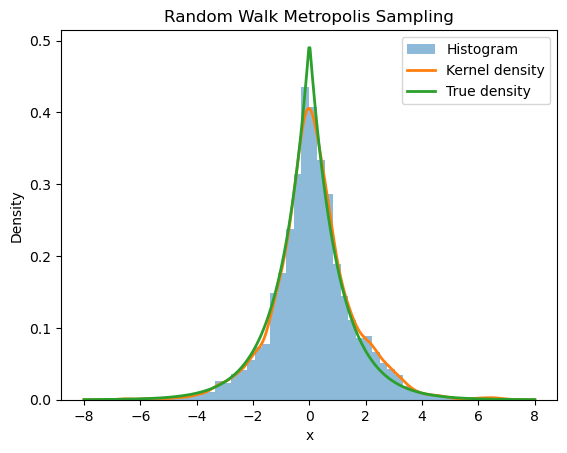

Sample mean: 0.13218160322129116
Sample standard deviation: 1.4310348640364492


In [4]:
x_grid = np.linspace(-8, 8, 400)
true_density = 0.5 * np.exp(-np.abs(x_grid))

plt.hist(y, bins=50, density=True, alpha=0.5, label="Histogram")
kde = gaussian_kde(y)
plt.plot(x_grid, kde(x_grid), label="Kernel density", linewidth=2)
plt.plot(x_grid, true_density, label="True density", linewidth=2)
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Random Walk Metropolis Sampling")
plt.legend()
plt.show()

# Monte Carlo estimates
print("Sample mean:", np.mean(y))
print("Sample standard deviation:", np.std(y, ddof=1))

In [5]:
np.random.seed(123000)

N = 2000
s = 0.001
J = 4
initial_values = [-10, -5, 5, 10]




In [6]:
s_values = np.linspace(0.001, 1, 30)
Rb_values = []

for s in s_values:
    chains = []
    for j in range(J):
        chain = rwm_chain(N, s, initial_values[j])
        chains.append(chain)
    
    Mj = np.array([np.mean(chain[1:]) for chain in chains])
    Vj = np.array([np.mean((chain[1:] - Mj[j])**2) for j, chain in enumerate(chains)])
    
    W = np.mean(Vj)
    M = np.mean(Mj)
    B = np.mean((Mj - M)**2)
    
    Rb = np.sqrt((B + W) / W)
    Rb_values.append(Rb)


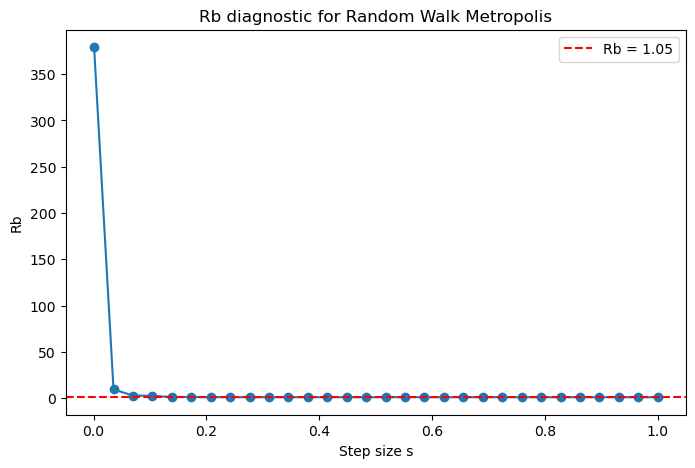

In [7]:
plt.figure(figsize=(8,5))
plt.plot(s_values, Rb_values, marker='o')
plt.axhline(1.05, color='red', linestyle='--', label='Rb = 1.05')
plt.xlabel('Step size s')
plt.ylabel('Rb')
plt.title('Rb diagnostic for Random Walk Metropolis')
plt.legend()
plt.show()
